<a href="https://colab.research.google.com/github/AngelTroncoso/Randon_Forests/blob/main/Random_Forests.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Bosques Aleatorios (Random Forests) 🌲🌲**

##1: Cargar los Datos:

In [ ]:
import pandas as pd
import io

csv_data = """ID_Parcela,Lluvia_mm,Temperatura_C,Tipo_Suelo,Cantidad_Fertilizante_kg,Rendimiento_Toneladas_Ha
1,800,20,Arcilloso,200,5.5
2,600,18,Arenoso,150,4.0
3,900,22,Franco,250,6.2
4,750,21,Arcilloso,220,5.8
5,500,17,Arenoso,120,3.5
6,850,23,Franco,240,6.0
7,700,19,Arcilloso,180,5.0
8,950,24,Franco,260,6.5
9,650,16,Arenoso,140,3.8
10,780,20,Arcilloso,210,5.6
11,550,17,Franco,130,4.2
12,820,22,Arenoso,230,5.9
"""
df = pd.read_csv(io.StringIO(csv_data))
print(df.head())

   ID_Parcela  Lluvia_mm  Temperatura_C Tipo_Suelo  Cantidad_Fertilizante_kg  \
0           1        800             20  Arcilloso                       200   
1           2        600             18    Arenoso                       150   
2           3        900             22     Franco                       250   
3           4        750             21  Arcilloso                       220   
4           5        500             17    Arenoso                       120   

   Rendimiento_Toneladas_Ha  
0                       5.5  
1                       4.0  
2                       6.2  
3                       5.8  
4                       3.5  


##2: Preprocesamiento (One-Hot Encoding):

In [ ]:
df = pd.get_dummies(df, columns=['Tipo_Suelo'], drop_first=True)
print("\nDataFrame después de One-Hot Encoding:")
print(df.head())


DataFrame después de One-Hot Encoding:
   ID_Parcela  Lluvia_mm  Temperatura_C  Cantidad_Fertilizante_kg  \
0           1        800             20                       200   
1           2        600             18                       150   
2           3        900             22                       250   
3           4        750             21                       220   
4           5        500             17                       120   

   Rendimiento_Toneladas_Ha  Tipo_Suelo_Arenoso  Tipo_Suelo_Franco  
0                       5.5               False              False  
1                       4.0                True              False  
2                       6.2               False               True  
3                       5.8               False              False  
4                       3.5                True              False  


##3: Definir Características (X) y Variable Objetivo (y):

In [ ]:
X = df.drop(['ID_Parcela', 'Rendimiento_Toneladas_Ha'], axis=1)
y = df['Rendimiento_Toneladas_Ha']

##4: Dividir Datos (Entrenamiento y Prueba):

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

##5: Entrenar Modelo de Bosques Aleatorios:

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# n_estimators es el número de árboles en el bosque
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\n--- Resultados Bosques Aleatorios ---")
print(f"MSE: {mean_squared_error(y_test, y_pred_rf):.2f}")
print(f"R^2: {r2_score(y_test, y_pred_rf):.2f}")

# Importancia de las características
print("\nImportancia de las características:")
for feature, importance in zip(X.columns, rf_model.feature_importances_):
    print(f"  {feature}: {importance:.4f}")


--- Resultados Bosques Aleatorios ---
MSE: 0.03
R^2: 0.92

Importancia de las características:
  Lluvia_mm: 0.2977
  Temperatura_C: 0.2882
  Cantidad_Fertilizante_kg: 0.3305
  Tipo_Suelo_Arenoso: 0.0782
  Tipo_Suelo_Franco: 0.0054


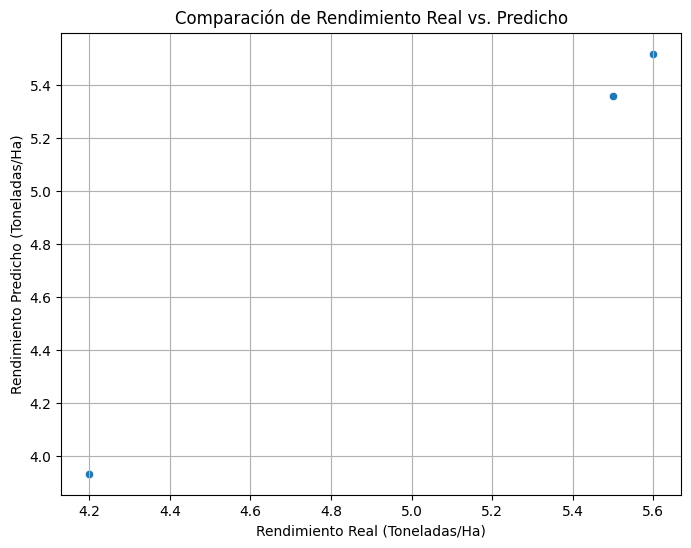

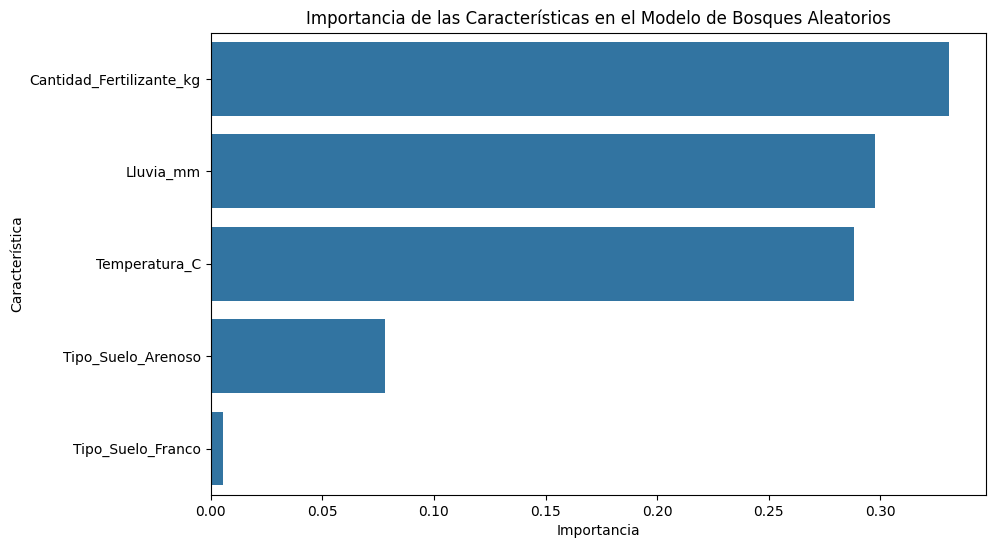

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Graficar comparación entre valores reales y predichos en el conjunto de prueba
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_pred_rf)
plt.xlabel("Rendimiento Real (Toneladas/Ha)")
plt.ylabel("Rendimiento Predicho (Toneladas/Ha)")
plt.title("Comparación de Rendimiento Real vs. Predicho")
plt.grid(True)
plt.show()

# Graficar la importancia de las características
feature_importance = pd.DataFrame({'feature': X.columns, 'importance': rf_model.feature_importances_})
feature_importance = feature_importance.sort_values('importance', ascending=False)

plt.figure(figsize=(10, 6))
sns.barplot(x='importance', y='feature', data=feature_importance)
plt.title('Importancia de las Características en el Modelo de Bosques Aleatorios')
plt.xlabel('Importancia')
plt.ylabel('Característica')
plt.show()